# Exploratory Data Analysis using Numeric Summaries and Graphical methods

### Importing the required libraries and Loading data from the UCI Database

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' 

In [35]:
column_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [39]:
data = pd.read_csv(url,header=None, names=column_names, na_values='?')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
# Eporting data to csv

# import os

# #Check the current working directory
# os.getcwd()

# # Change the current working directory
# os.chdir('Drive:\\New\\Working\\Dir')

# # Define the working directory
# working_directory = 'Drive:\\Curent\\Working\\Dir'

# # Save the dataset to the working directory
# file_path = os.path.join(working_directory, 'adult_dataset.csv')
# data.to_csv(file_path, index=False)

# print(f'Dataset saved to {file_path}')

### Exploring Columns

In [44]:
# Shape of data
data.shape

(32561, 15)

In [46]:
# Check the column names
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [48]:
# Some information form each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
# Create age group (we need to analyse age using both numerical and categorically)
def age_group(age):
    if age < 30:
        return "Young"
    elif 30 <= age <= 50:
        return "Middle"
    else:
        return "Old"

In [52]:
# Adding age group column to the original data frame
data['Age group'] = data['age'].apply(age_group)

In [54]:
# Come up with a function for identifying numeric and categorical columns
def num_cate(df):
    '''
    Separate numeric and categorical columns using select_dtypes
    '''
    numeric = df.select_dtypes(include='number')
    categorical = df.select_dtypes(include='object')

    return numeric, categorical

In [56]:
# Call the function
numeric_columns, categorical_columns = num_cate(data)

# Print the outcomes
print(f' {"=" * 80}')
print(f'Numeric Columns: {numeric_columns.columns}')
print(f' {"=" * 80}')
print(f'Categorical columns: {categorical_columns.columns}')
print(f' {"=" * 80}')

Numeric Columns: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Categorical columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income', 'Age group'],
      dtype='object')


## Univariate analysis

### Summarising Categorical data numerically

In [60]:
# Check unique values in each categorical column
categorical_columns.nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
income             2
Age group          3
dtype: int64

In [62]:
# Let us create a functions for summarizing categorical data numerically

def count_and_share(df,col):
    # Calculate count and percentage share
    counts = df[col].value_counts()
    share = df[col].value_counts(normalize=True) * 100

    # Combine count and percentage share into a DataFrame
    summary = pd.DataFrame({'Count': counts, '(%)Share': share})

    # Round the percentage share to 2 decimal places and add the percentage symbol
    summary['(%)Share'] = summary['(%)Share'].round(2).astype(str) + '%'
    
    # Sort by percentage share in descending order
    summary = summary.sort_values(by='Count', ascending=False)

    return summary        

In [64]:
for col in data.select_dtypes(include=['object', 'category']):  # Loop through categorical columns
    if len(col) <= 9:  # Check if the length of the column name is <= 9
        summary = count_and_share(data, col)
        print(f'{"_"*35}')
        print(f"Summary for \t{col}:\n{summary}\n")
    elif len(col) > 9:  # Get the top 5 counts if the length of the column name is > 9
        top_counts = summary.nlargest(5, 'Count')
        print(f'{"_"*35}')
        print(f"Summary for \t{col} (Top 5):\n{top_counts}\n")
    else:
        print("No Categorical columns")

___________________________________
Summary for 	workclass:
                  Count (%)Share
workclass                       
Private           22696    69.7%
Self-emp-not-inc   2541     7.8%
Local-gov          2093    6.43%
?                  1836    5.64%
State-gov          1298    3.99%
Self-emp-inc       1116    3.43%
Federal-gov         960    2.95%
Without-pay          14    0.04%
Never-worked          7    0.02%

___________________________________
Summary for 	education:
              Count (%)Share
education                   
HS-grad       10501   32.25%
Some-college   7291   22.39%
Bachelors      5355   16.45%
Masters        1723    5.29%
Assoc-voc      1382    4.24%
11th           1175    3.61%
Assoc-acdm     1067    3.28%
10th            933    2.87%
7th-8th         646    1.98%
Prof-school     576    1.77%
9th             514    1.58%
12th            433    1.33%
Doctorate       413    1.27%
5th-6th         333    1.02%
1st-4th         168    0.52%
Preschool        51    

### Summarising continuous data numerically (Statistical techniques)

In [68]:
def numerical_summary(df, col):
    mean = int(df[col].mean())
    var = int(df[col].var())
    std = int(df[col].std())
    min_val = int(df[col].min())
    Q1 = int(df[col].quantile(0.25))
    Q2 = int(df[col].quantile(0.50))
    Q3 = int(df[col].quantile(0.75))
    max_val = int(df[col].max())

    # Create a summary as a list of tuples
    summary = [
        ('Mean', mean), 
        ('Variance', var),
        ('Standard deviation', std),
        ('Minimum value', min_val),
        ('Lower quantile (25%)', Q1),
        ('Median (50%)', Q2),
        ('Upper quantile (75%)', Q3),
        ('Maximum value', max_val)
    ]
    
    return summary

In [70]:
# Iterate through the numerical columns of the DataFrame and print the summary
for col in data.select_dtypes(include='number'):  # Loop through numerical columns
    summary = numerical_summary(data, col)
    print(f'{"_"*35}')
    print(f"Summary for {col}:")
    for key, value in summary:  # Unpack the tuple
        print(f"\t{key}: {value}")
    print()  # Print a newline for better separation

___________________________________
Summary for age:
	Mean: 38
	Variance: 186
	Standard deviation: 13
	Minimum value: 17
	Lower quantile (25%): 28
	Median (50%): 37
	Upper quantile (75%): 48
	Maximum value: 90

___________________________________
Summary for fnlwgt:
	Mean: 189778
	Variance: 11140797791
	Standard deviation: 105549
	Minimum value: 12285
	Lower quantile (25%): 117827
	Median (50%): 178356
	Upper quantile (75%): 237051
	Maximum value: 1484705

___________________________________
Summary for education-num:
	Mean: 10
	Variance: 6
	Standard deviation: 2
	Minimum value: 1
	Lower quantile (25%): 9
	Median (50%): 10
	Upper quantile (75%): 12
	Maximum value: 16

___________________________________
Summary for capital-gain:
	Mean: 1077
	Variance: 54542539
	Standard deviation: 7385
	Minimum value: 0
	Lower quantile (25%): 0
	Median (50%): 0
	Upper quantile (75%): 0
	Maximum value: 99999

___________________________________
Summary for capital-loss:
	Mean: 87
	Variance: 162376
	Stan

### Summarising Categorical data graphically

In [73]:
categorical_columns.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income', 'Age group'],
      dtype='object')

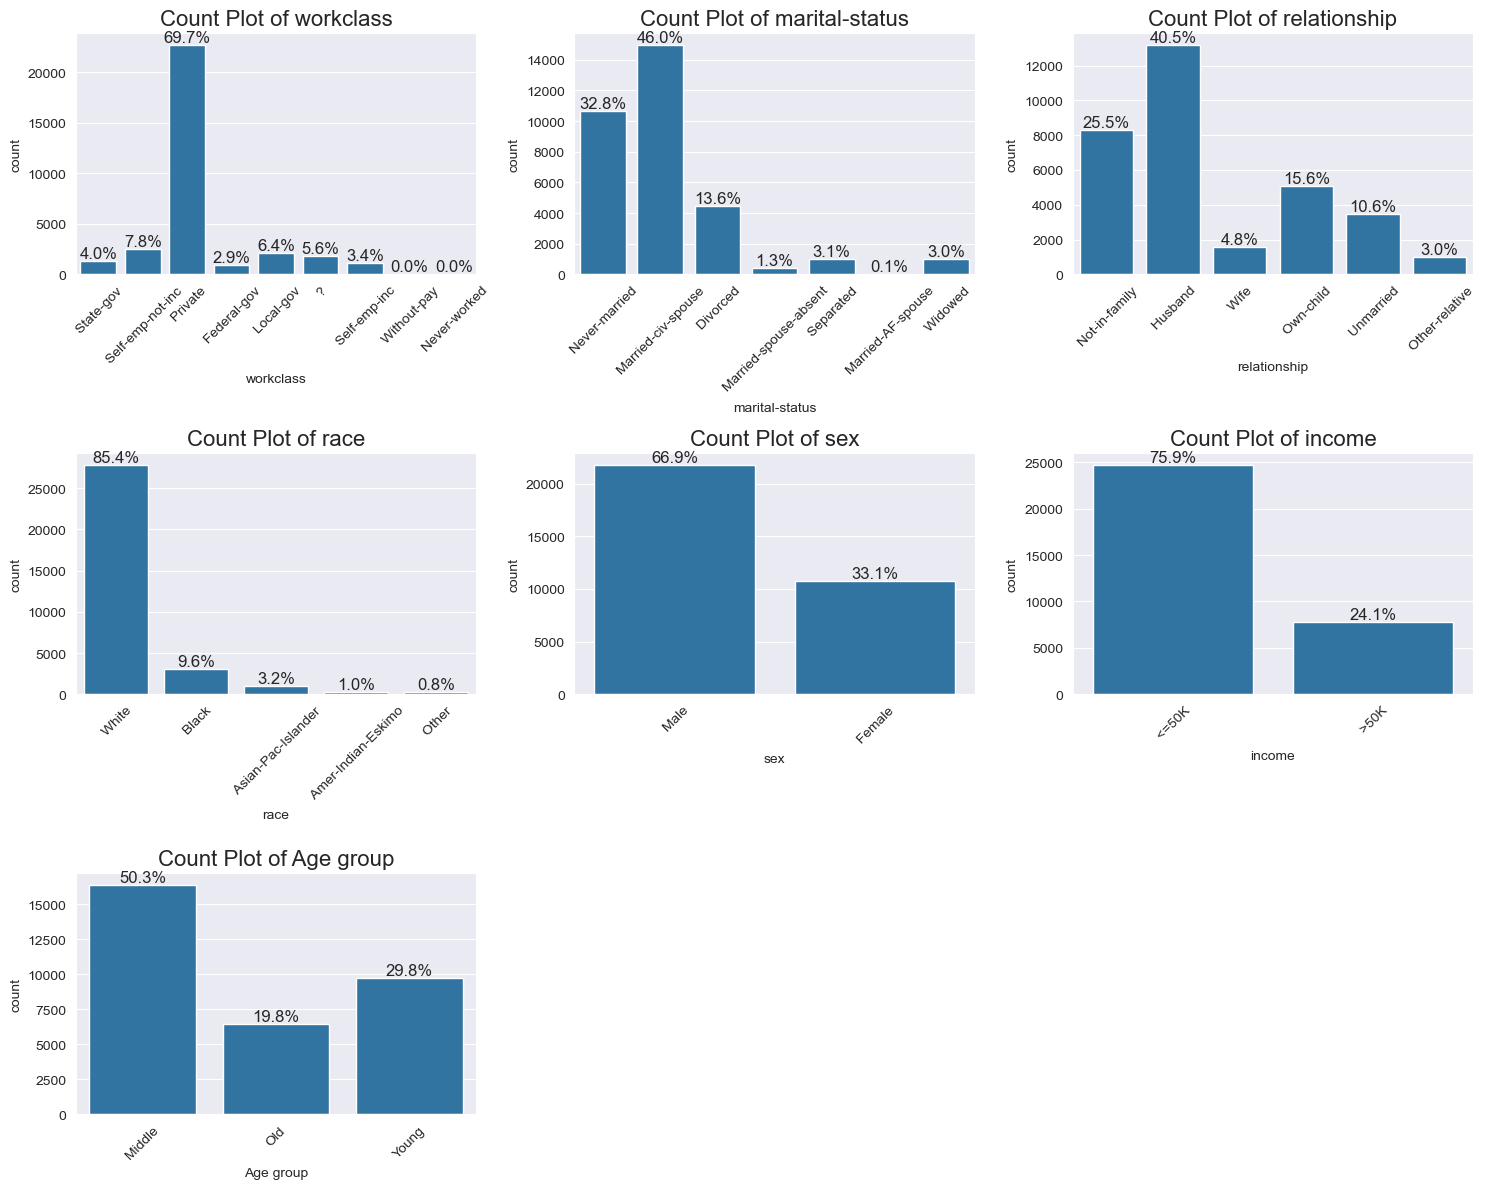

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['workclass', 'marital-status','relationship', 'race', 'sex', 'income', 'Age group']

n_cols = 3  # Number of columns in the grid
n_rows = len(categorical_columns) // n_cols + 1  # Calculate the number of rows needed

# Set a maximum number of rows 
max_rows = 10 
n_rows = min(n_rows, max_rows)  # Cap the number of rows

sns.set_style('darkgrid')  # Set plot style
plt.figure(figsize=(15, 4 * n_rows))  # Set the figure size, limiting n_rows to max_rows

# Loop through each categorical column and plot it
for i, col in enumerate(categorical_columns[:n_cols * n_rows]):  # Limit the number of plots
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot in the grid
    ax = sns.countplot(data=data, x=col)  # Create count plot for the column
    plt.title(f'Count Plot of {col}', fontsize=16)  # Set title for each plot with increased font size
    plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability with increased font size

    # Calculate percentage share and add labels on top of each bar
    total = len(data)  # Total number of data points
    for p in ax.patches:
        percentage = f'{(p.get_height() / total) * 100:.1f}%'  # Calculate percentage
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12)  # Add label above the bar with increased font size

plt.tight_layout()  # Adjust the layout to prevent overlapping of plots
plt.show()  # Display the plots


### Summarising numeric data graphically

In [79]:
numeric_columns.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# A function that creates density plots, histograms, and boxplots
def numeric_cols(df,x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    print(f'{"="*120}')
    print(f'5 Number Summary of {x} Attribute:\n'
          f'{x}(min)              :{x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x}(max) : {x_max}'
         )

    fig = plt.figure(figsize=(10, 5))
    plt.subplots_adjust(hspace= 0.6)
    sns.set_palette('pastel')
    sns.set_style('darkgrid') 

    # Density Distribution
    plt.subplot(221)
    ax1 = sns.histplot(df[x], kde=True)
    plt.title(f'{x} Density Distribution')

    # Boxplot
    plt.subplot(222)
    ax1 = sns.boxplot(x=df[x], width=0.7, linewidth=0.6)
    plt.title(f'{x} Boxplot')

    # Cumulative Density Distribution
    plt.subplot(223)
    ax1 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x} Cumulative Density Distribution')

    plt.show()

5 Number Summary of age Attribute:
age(min)              :17
Q1                    : 28.0
Q2(Median)            : 37.0
Q3                    : 48.0
age(max) : 90


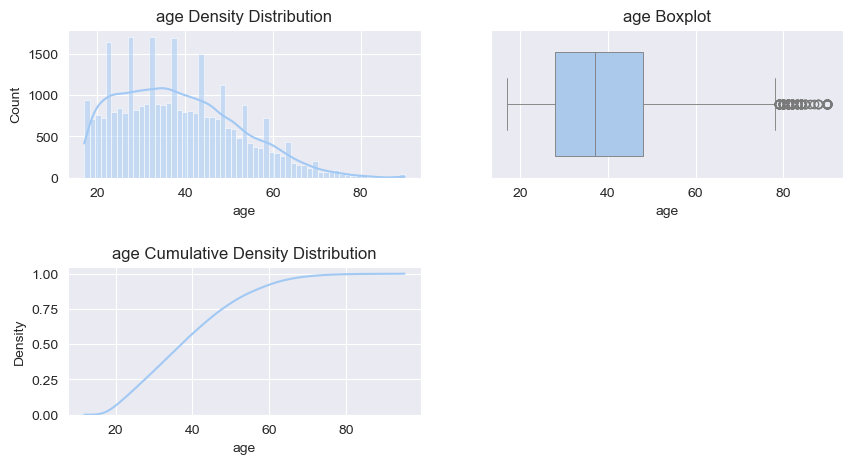

5 Number Summary of fnlwgt Attribute:
fnlwgt(min)              :12285
Q1                    : 117827.0
Q2(Median)            : 178356.0
Q3                    : 237051.0
fnlwgt(max) : 1484705


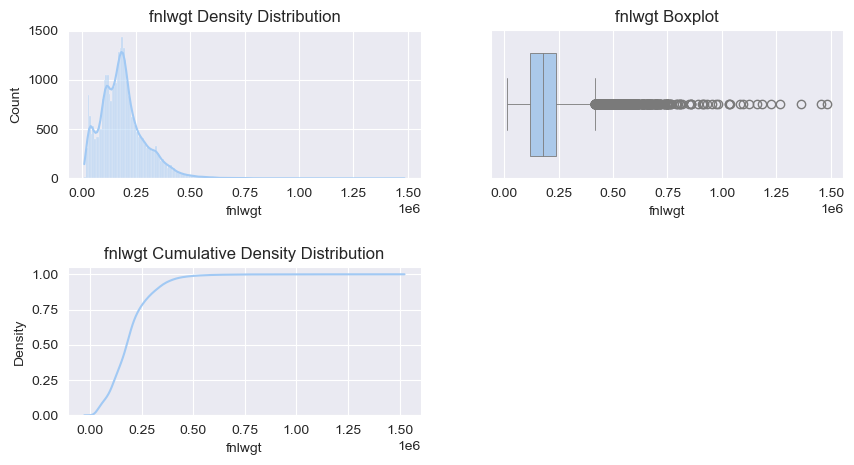

5 Number Summary of education-num Attribute:
education-num(min)              :1
Q1                    : 9.0
Q2(Median)            : 10.0
Q3                    : 12.0
education-num(max) : 16


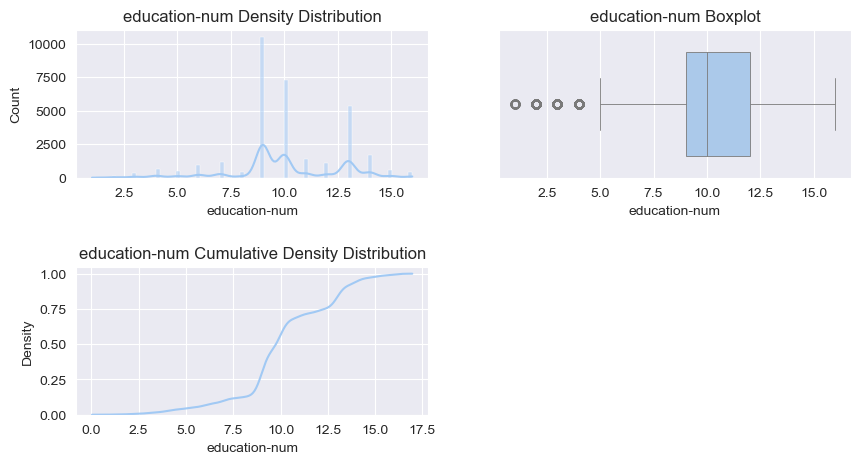

In [83]:
numeric_columns = ['age', 'fnlwgt', 'education-num']
for col in numeric_columns:
    numeric_cols(data, col)

## Bivariate analysis

### Numerical vs Numerical

#### Scatter Plot

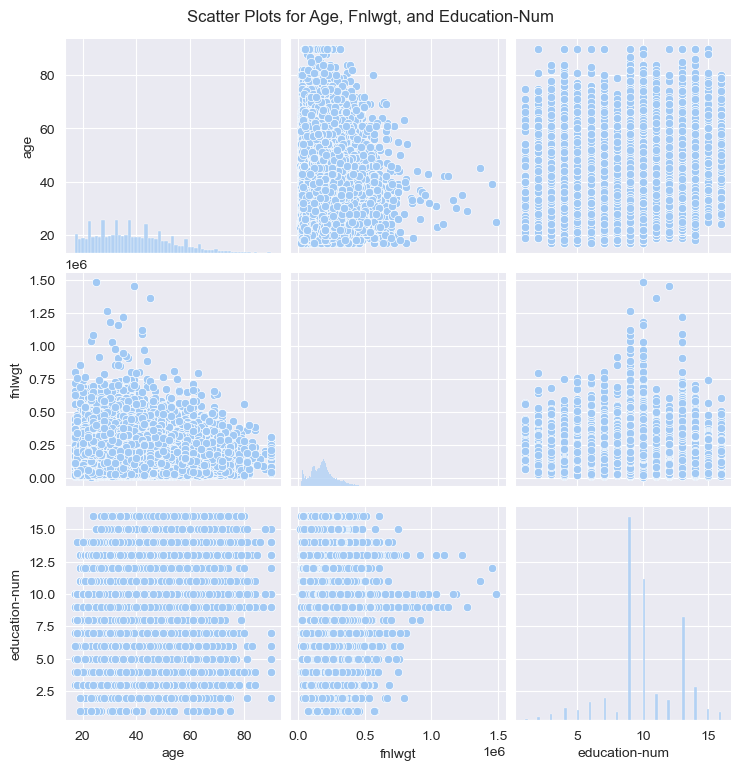

In [87]:
numeric_columns = ['age', 'fnlwgt', 'education-num']

# Create pairplot for the selected numeric columns
sns.pairplot(data[numeric_columns])
plt.suptitle('Scatter Plots for Age, Fnlwgt, and Education-Num', y=1.02)
plt.show()

#### Correlation Heatmap

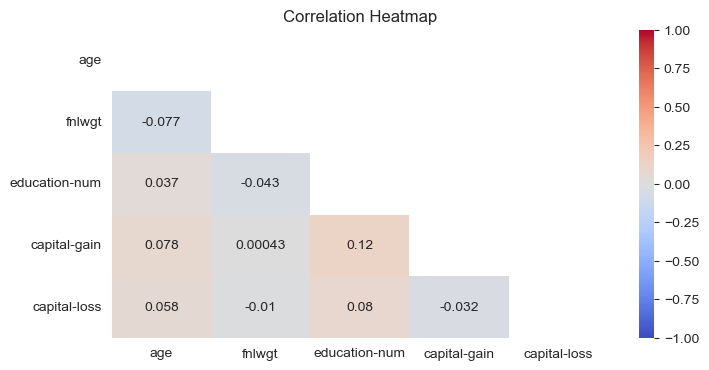

In [90]:
import numpy as np
# Select only numerical columns
numerical_df = data.select_dtypes(include=['float64', 'int64'])
numerical_df = numerical_df.drop(columns=['hours-per-week'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.set_style('white')# Set Seaborn style to 'white' to disable grid style
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Categorical vs Categorical

#### Stacked Bar Chart

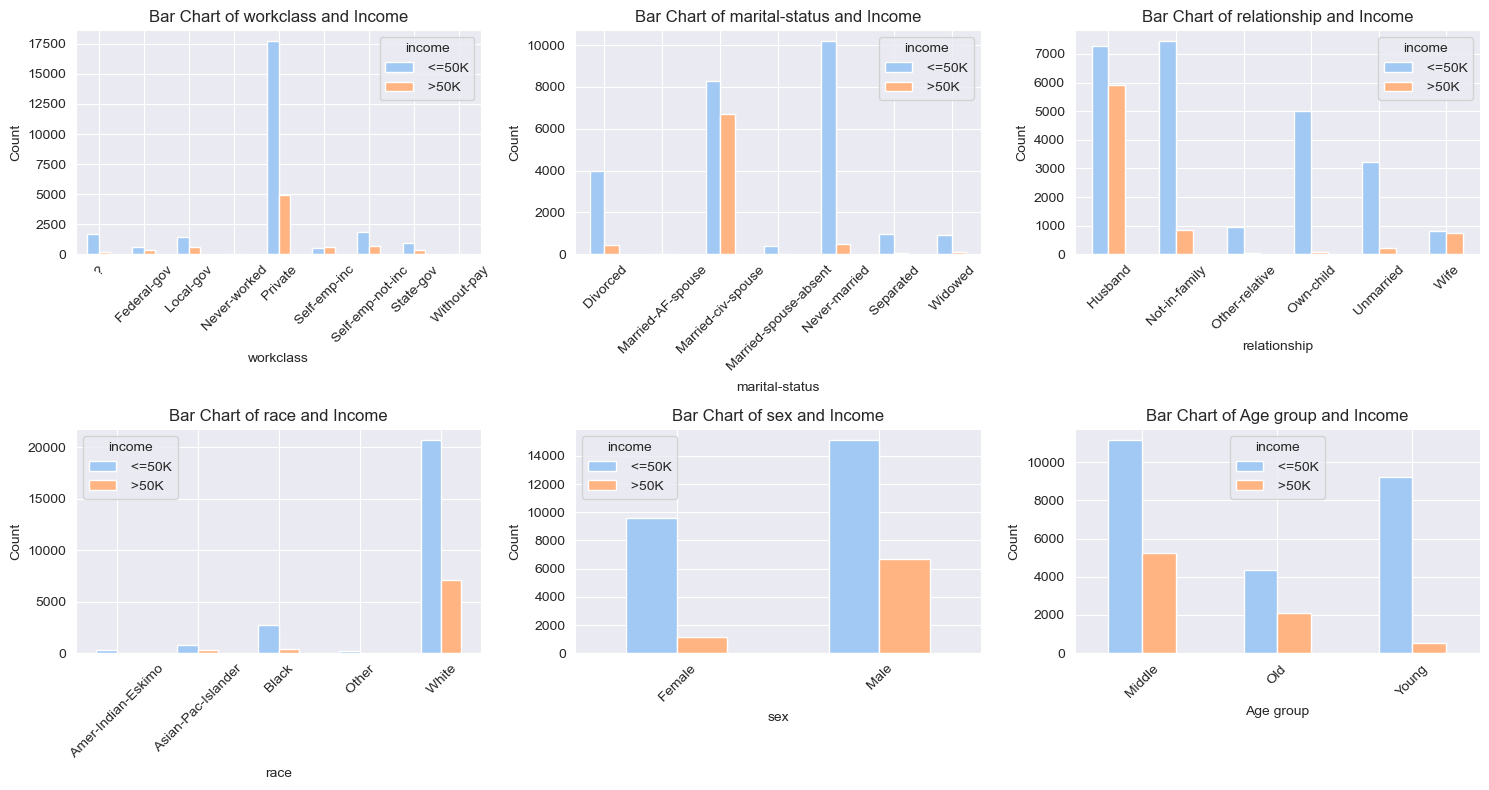

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorical_columns = ['workclass', 'marital-status', 'relationship', 'race', 'sex', 'Age group']
n_cols = 3  # Number of columns in the grid
n_rows = len(categorical_columns) // n_cols + (len(categorical_columns) % n_cols > 0)  # Calculate the number of rows needed

# Set plot style
sns.set_style('darkgrid')  

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))  # Adjust figure size based on the number of rows

# Flatten axes array for easy indexing (in case of 2D array of subplots)
axes = axes.flatten()

# Loop through each categorical column and create a crosstab with income
for idx, column in enumerate(categorical_columns):
    if column in data.columns:  # Check if the column exists in the DataFrame
        # Create a crosstab for the current column vs. income
        crosstab = pd.crosstab(data[column], data['income'])
        
        # Plot a bar chart (non-stacked) for the current crosstab in the corresponding subplot
        crosstab.plot(kind='bar', ax=axes[idx], stacked=False)
        axes[idx].set_title(f'Bar Chart of {column} and Income')
        axes[idx].set_ylabel('Count')
        axes[idx].set_xlabel(column)
        axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
    else:
        print(f"Column '{column}' not found in the data.")

# Remove any empty subplots (if the number of plots is less than n_rows * n_cols)
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to ensure the plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

### Categorical vs Numerical

#### Groupby Summarization

In [67]:
# Finding the amount of capital gained and lost for each marital status per
data.groupby(['marital-status','income'])[['capital-gain', 'capital-loss']].sum()

capital-gain  capital-loss
marital-status        income                            
Divorced              <=50K         559368        223195
                      >50K         2676979         63826
Married-AF-spouse     <=50K           2653             0
                      >50K            7298             0
Married-civ-spouse    <=50K        1816263        502106
                      >50K        24614273       1331542
Married-spouse-absent <=50K          40919         18552
                      >50K          232446          5600
Never-married         <=50K        1009543        466422
                      >50K         3013550         92785
Separated             <=50K         112386         44210
                      >50K          436572         15353
Widowed               <=50K         136029         59208
                      >50K          431045         19901

In [69]:
# Finding the capital lost for each Gender per race

pivot_table = pd.pivot_table(data, index = 'race',
               columns = 'sex', 
               values = 'capital-loss',
               aggfunc= 'mean' )
# Round the values to 2 decimal places
pivot_table_rounded = pivot_table.round(2)
pivot_table_rounded

sex,Female,Male
race,,
Amer-Indian-Eskimo,14.46,46.40
Asian-Pac-Islander,50.85,120.37
Black,45.45,75.19
Other,36.28,77.75
White,65.39,102.26


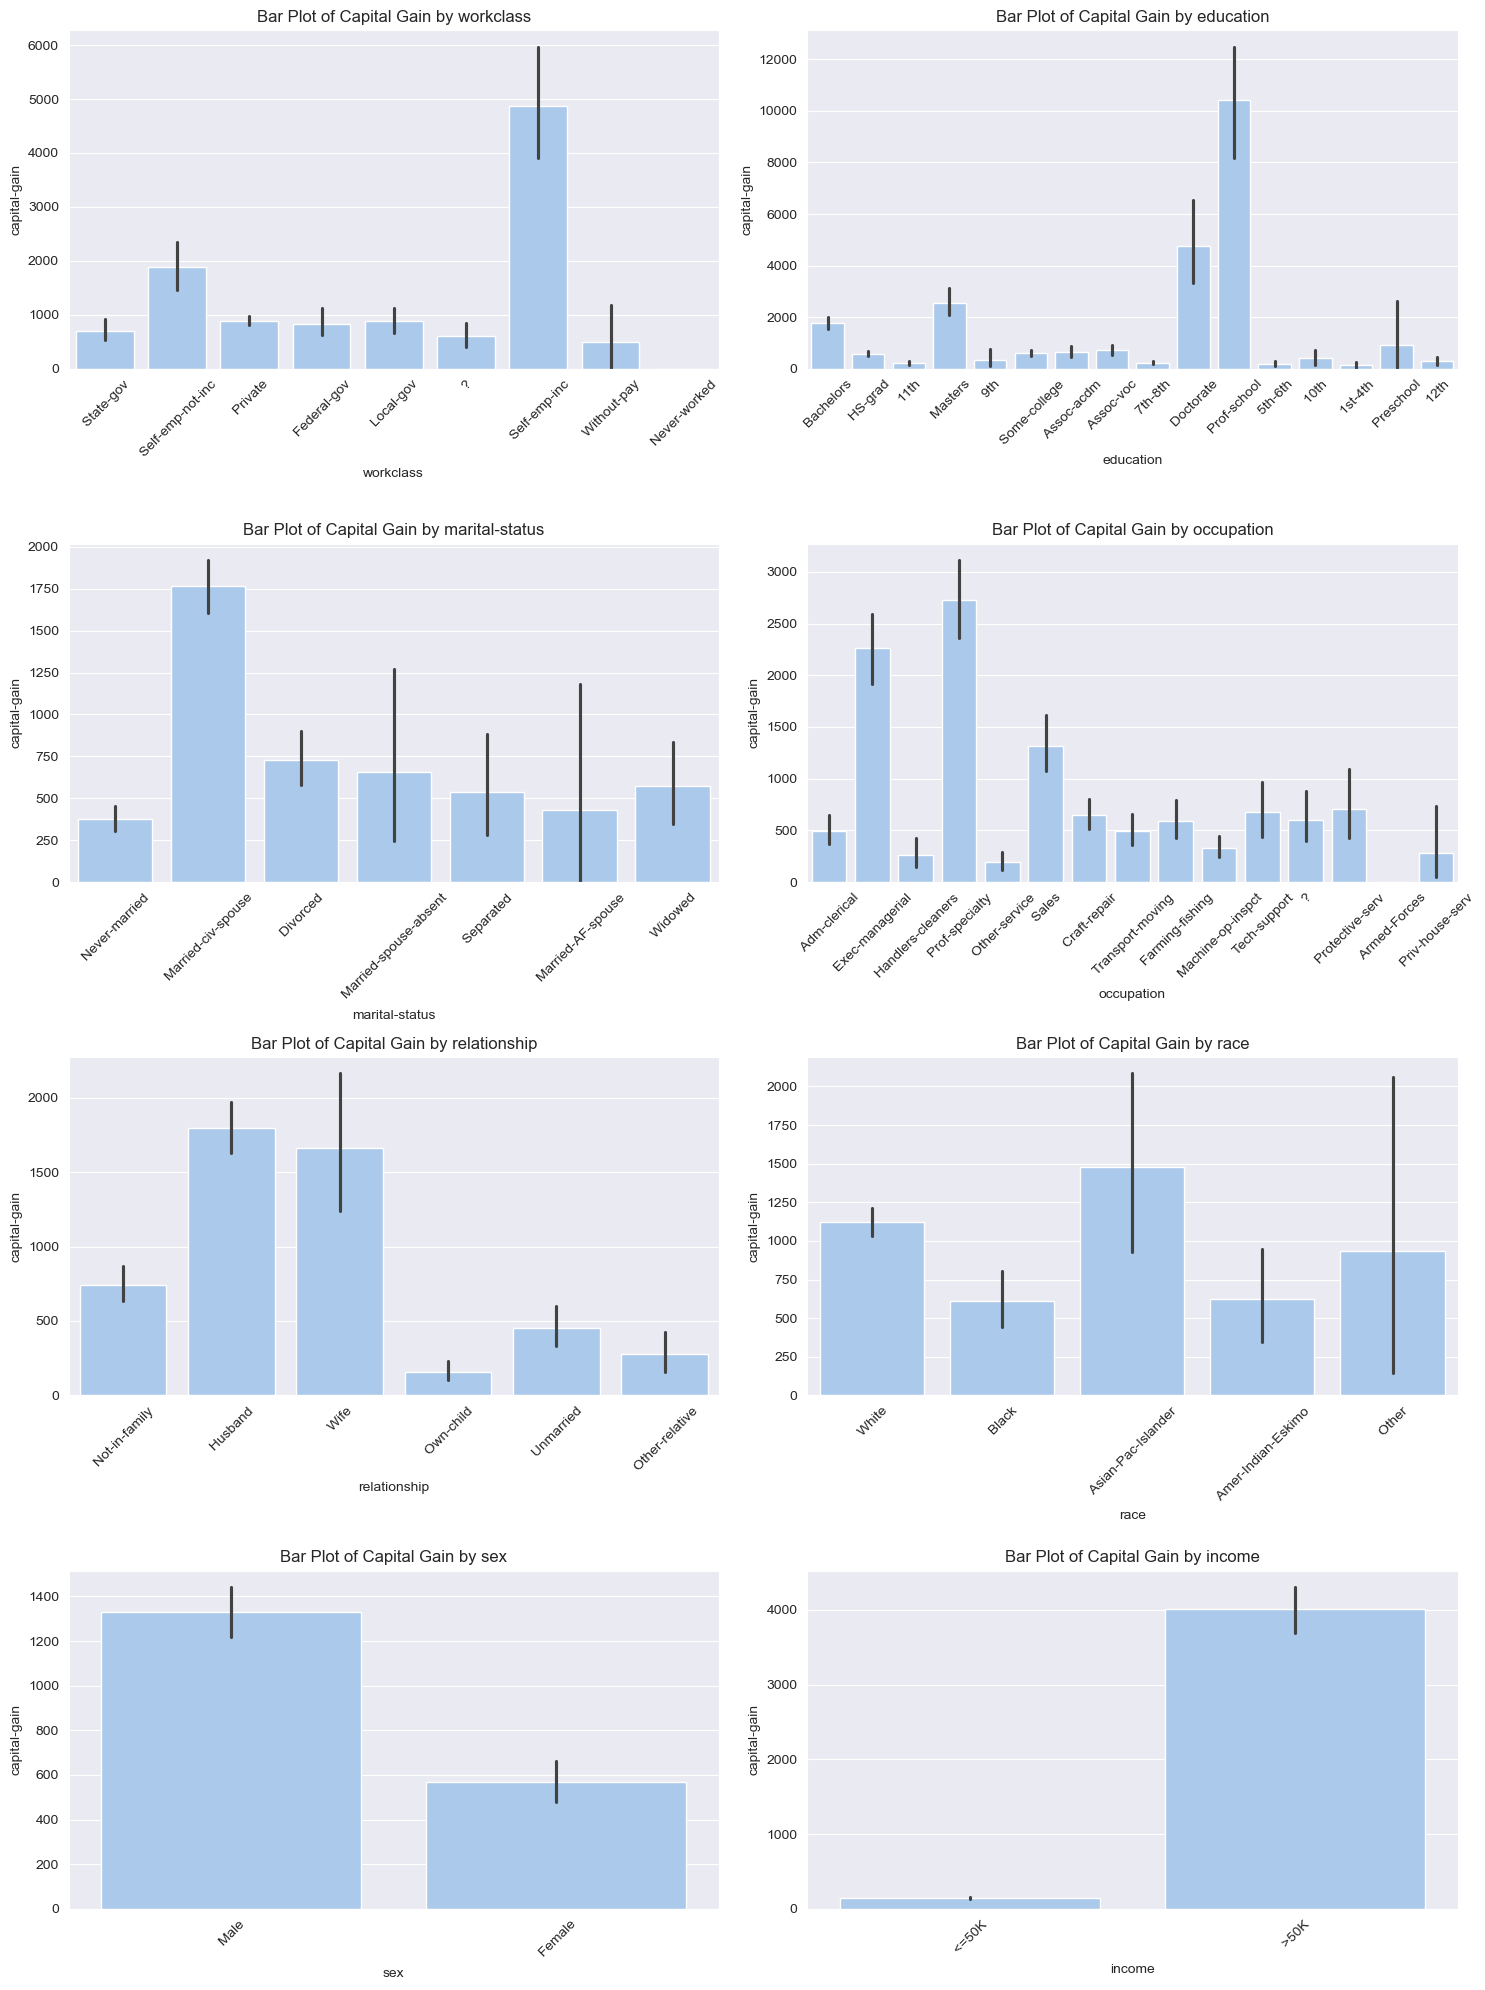

In [131]:
# List of categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'income']

# Set up the plotting environment
plt.figure(figsize=(15, 20))

# Loop through each categorical column to create box plots for capital-gain
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 2, i + 1) 
    sns.barplot(x=col, y='capital-gain', data=data)
    plt.title(f'Bar Plot of Capital Gain by {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

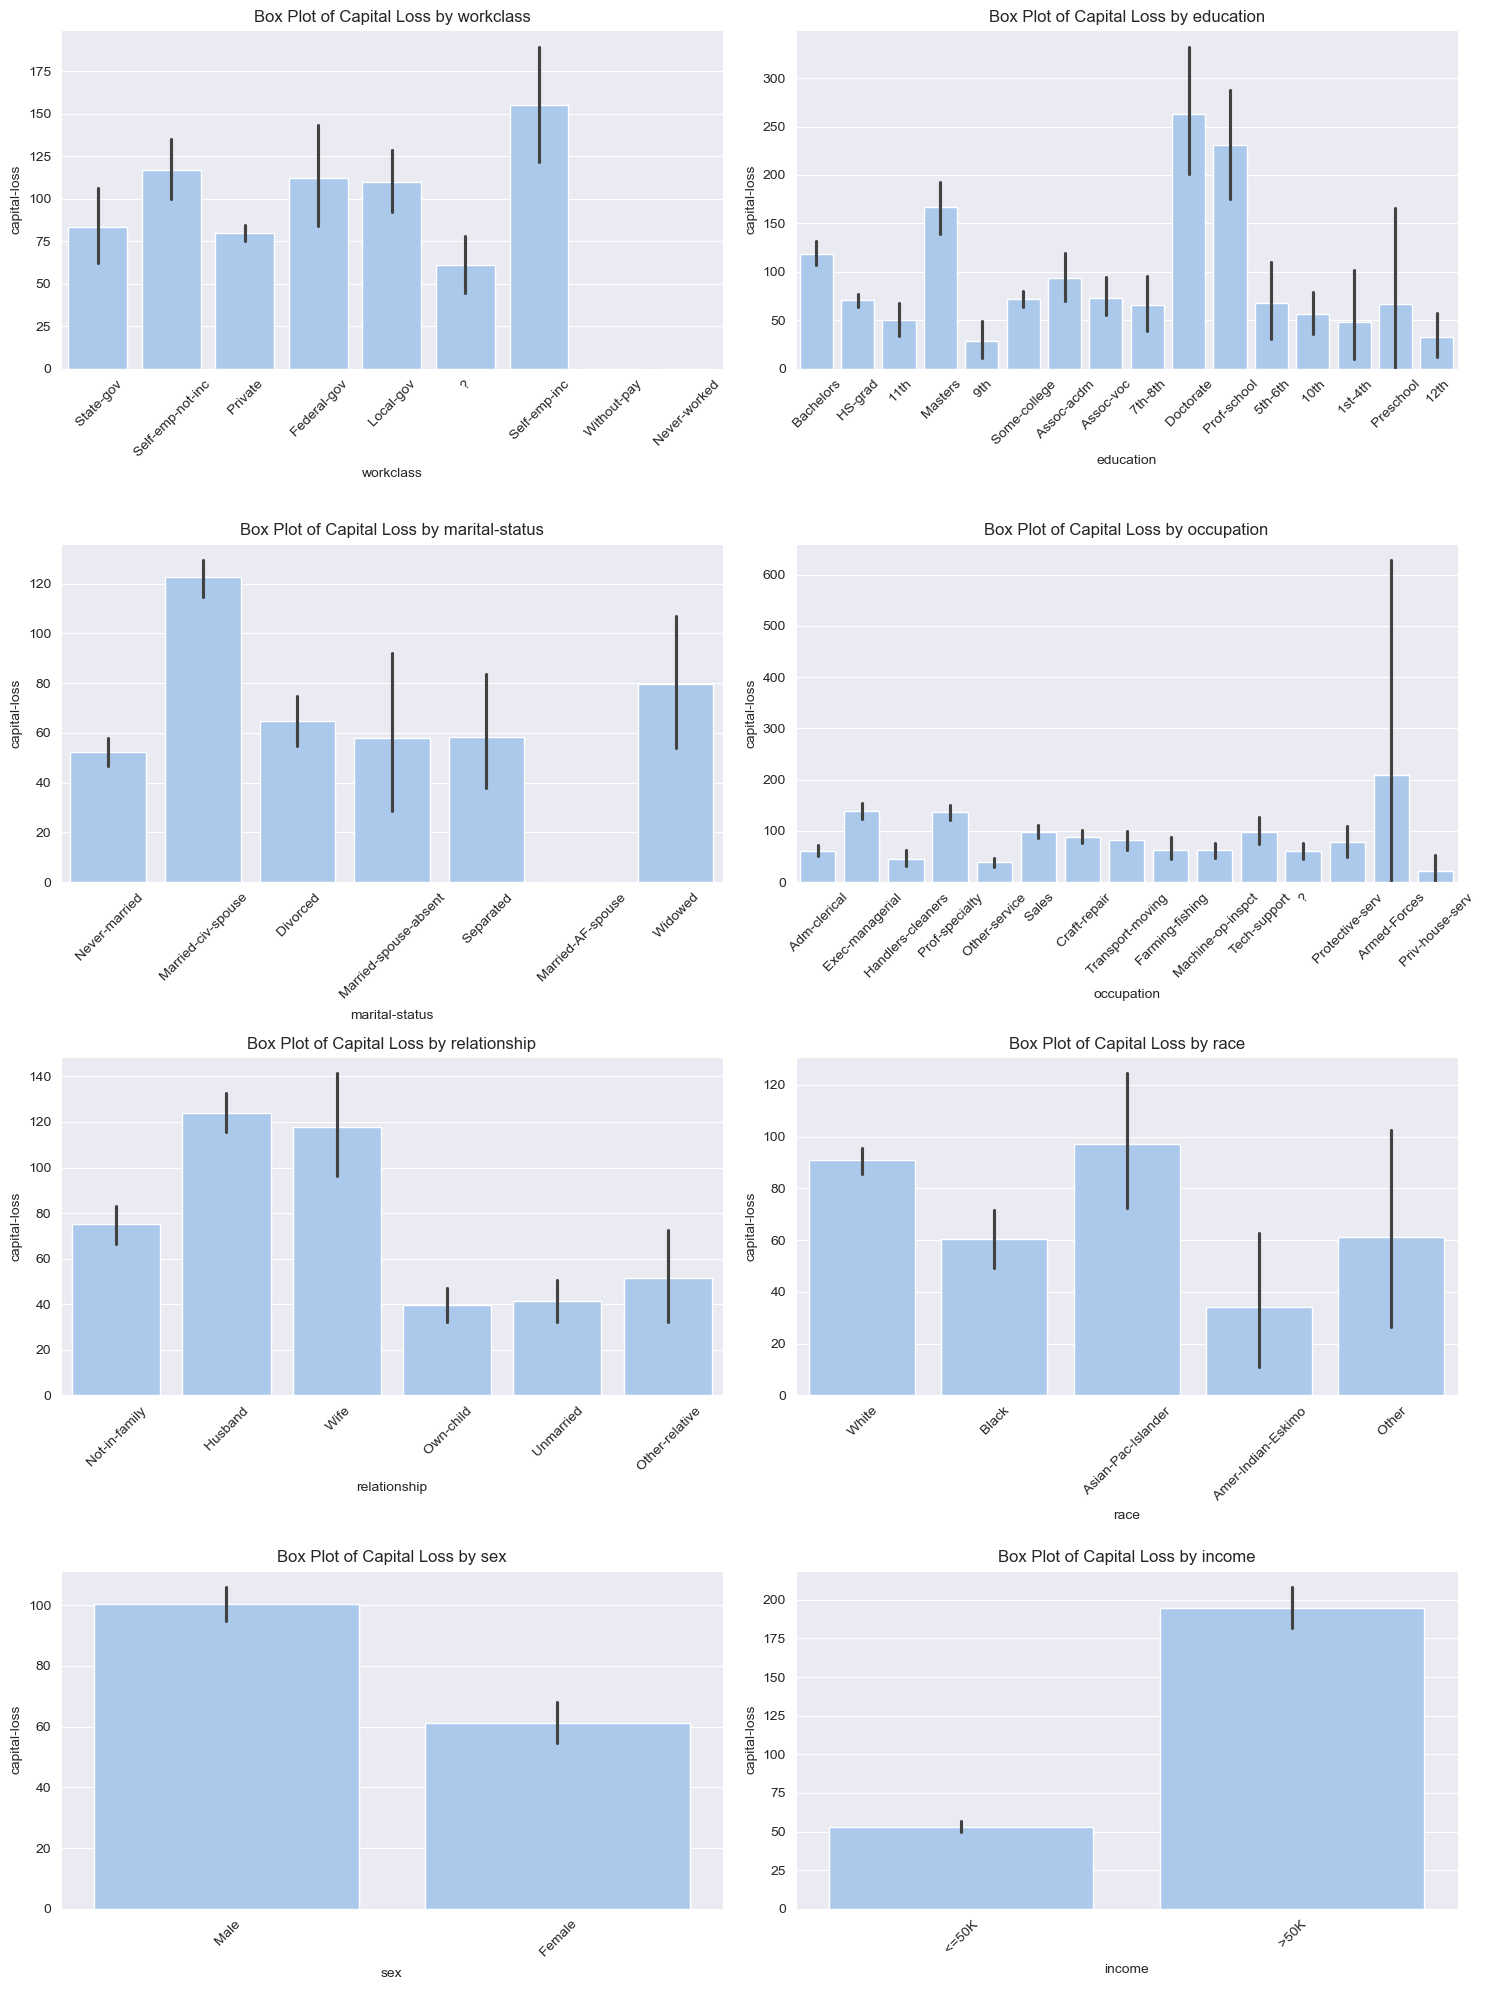

In [133]:

# Loop through each categorical column to create box plots for capital-gain
plt.figure(figsize=(15, 20))

for i, col in enumerate(categorical_columns):
    plt.subplot(4, 2, i + 1)
    sns.barplot(x=col, y='capital-loss', data=data)
    plt.title(f'Box Plot of Capital Loss by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()